<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Chronic Kidney Disease Prediction</strong></p>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [95]:
# loading data

df= pd.read_csv('/content/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [96]:
df.shape

(400, 26)

In [97]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [98]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [99]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [100]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count'  are object type. We need to change them to numerical dtype.</strong></p>

In [102]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [104]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [105]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>There is some ambugity present in the columns we have to remove that.</strong></p>

In [106]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [107]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [108]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



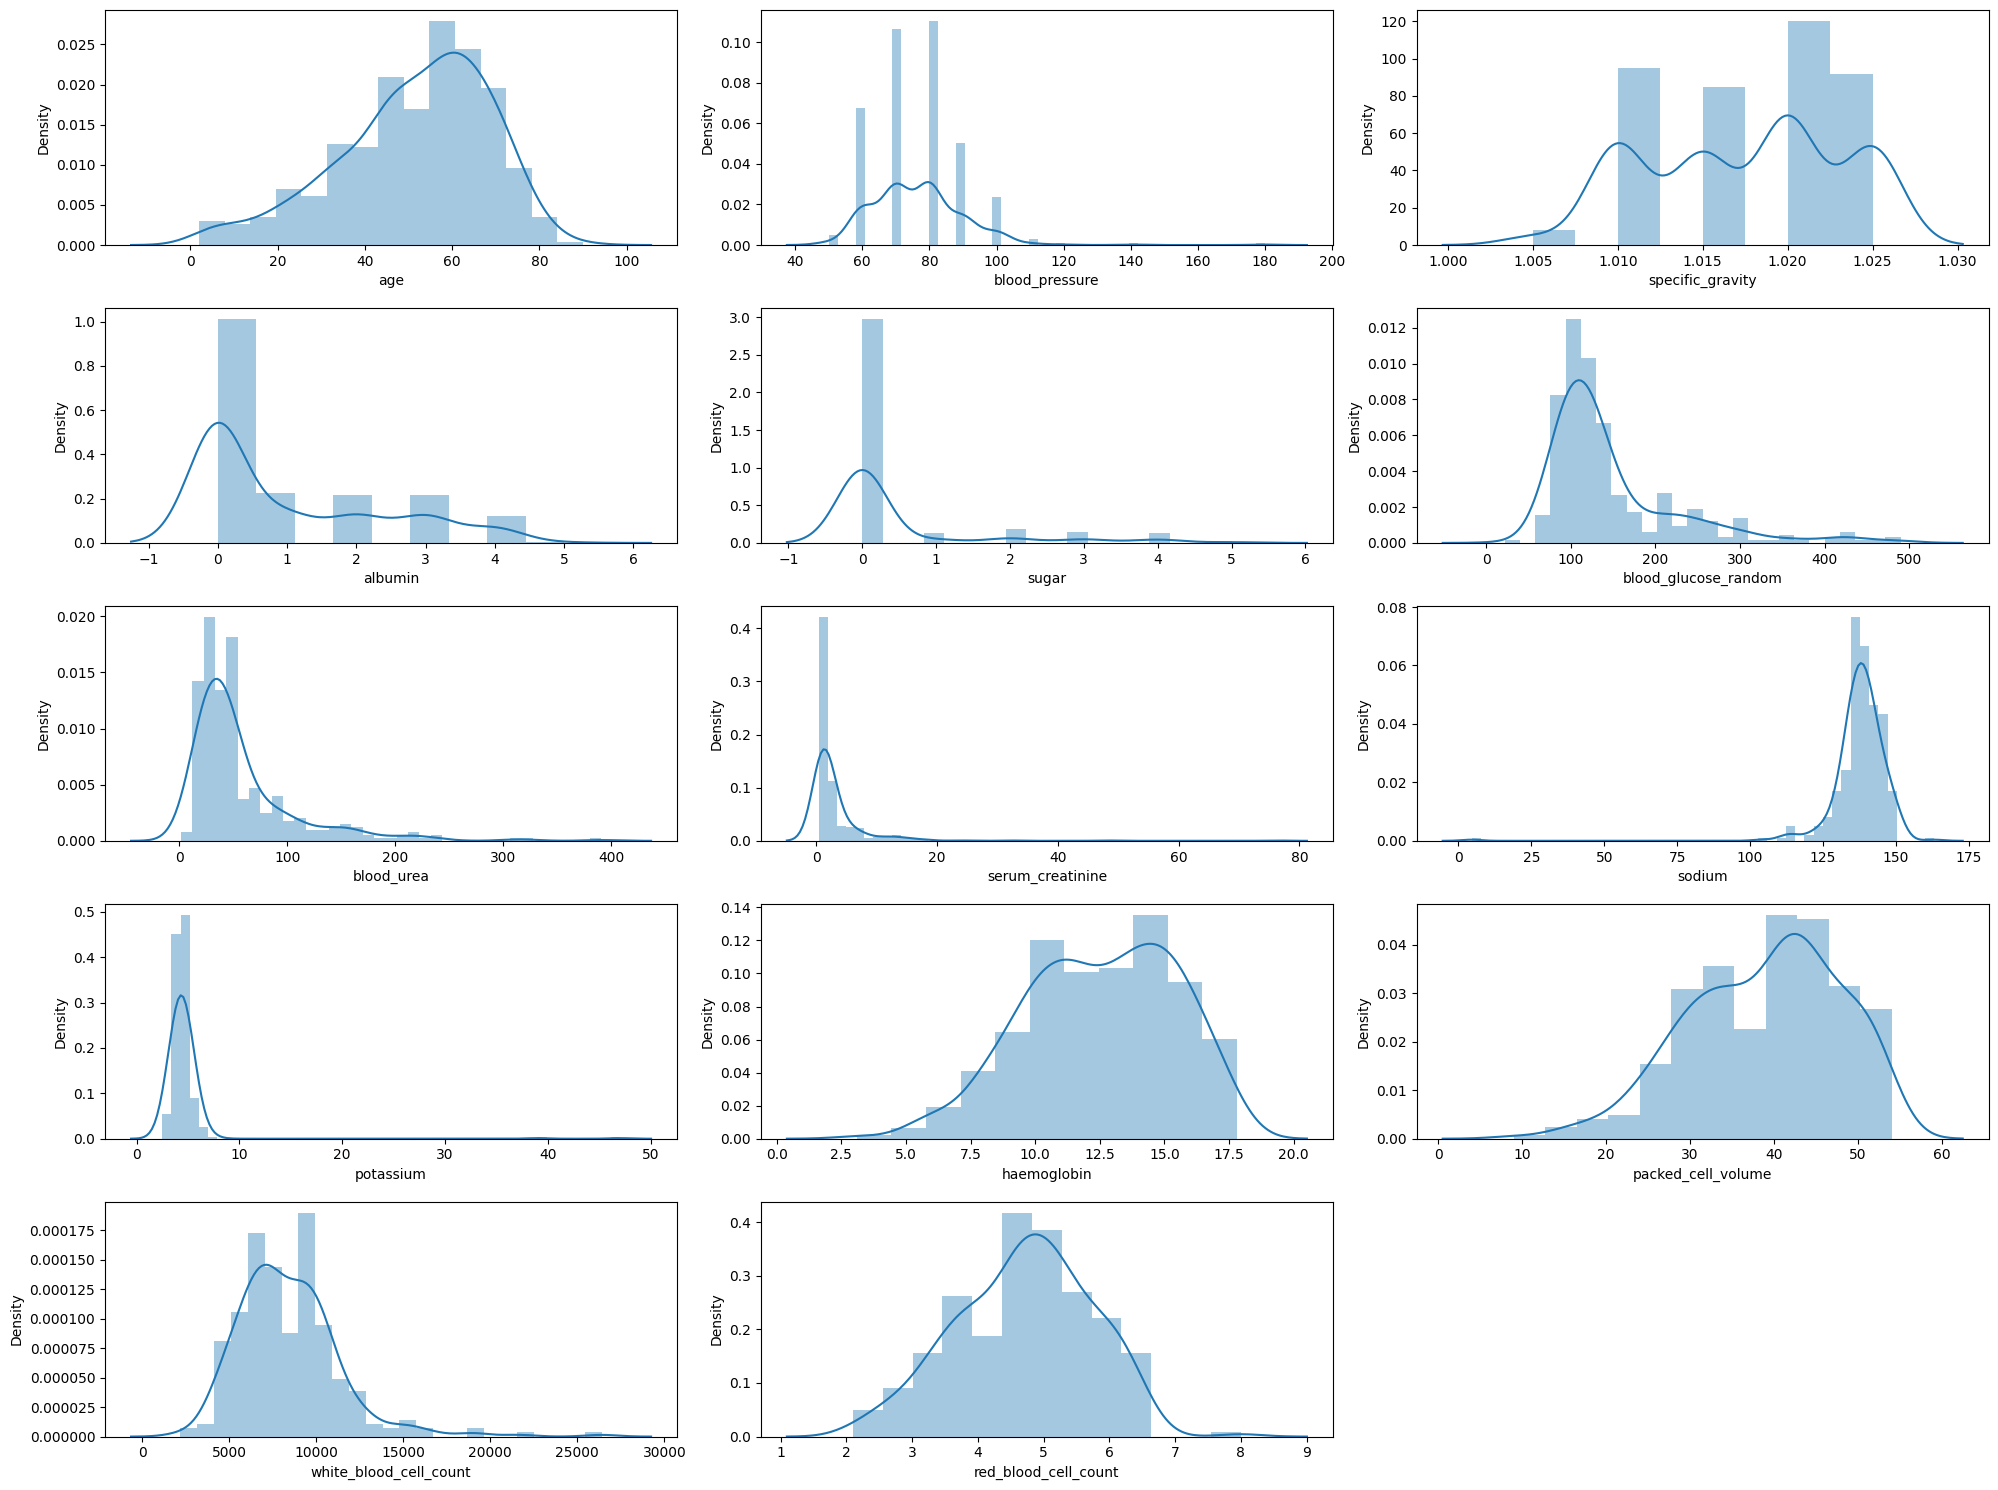

In [109]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(5, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Skewness is present in some of the columns.</strong></p>

<Axes: xlabel='red_blood_cells', ylabel='count'>

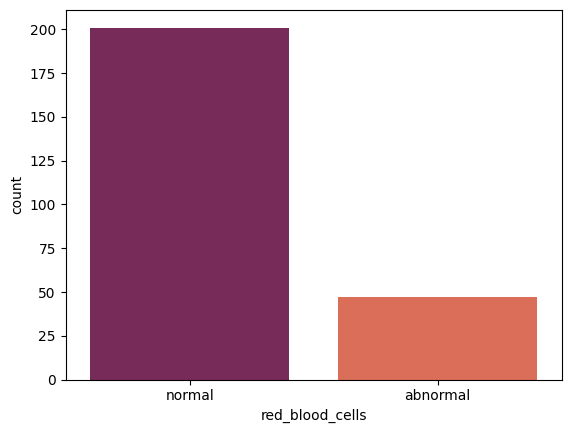

In [110]:
#sns.countplot(df['red_blood_cells'], palette = 'rocket')
cat_cols1=['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'anemia']

sns.countplot(df, x='red_blood_cells',palette='rocket')


<Axes: xlabel='pus_cell', ylabel='count'>

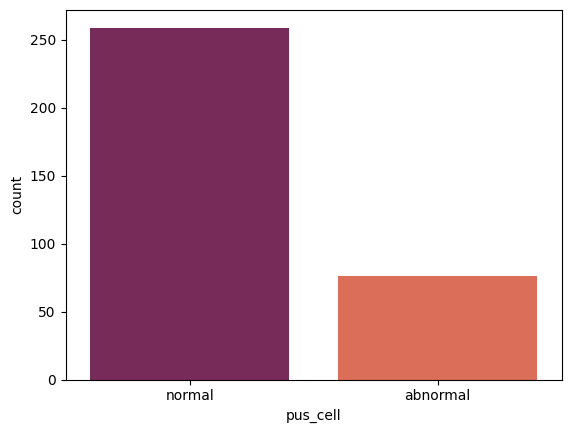

In [111]:
sns.countplot(df, x='pus_cell',palette='rocket')

<Axes: xlabel='pus_cell_clumps', ylabel='count'>

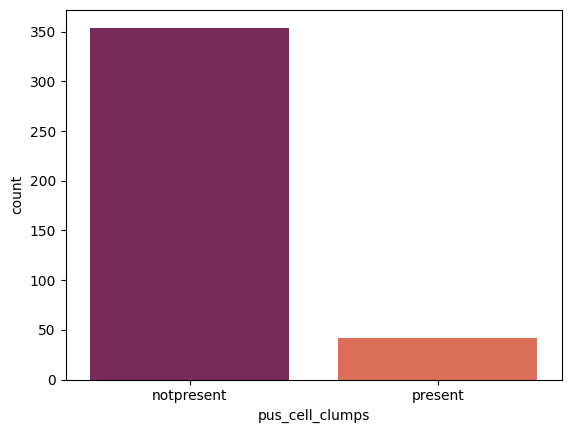

In [112]:
sns.countplot(df, x='pus_cell_clumps',palette='rocket')

<Axes: xlabel='bacteria', ylabel='count'>

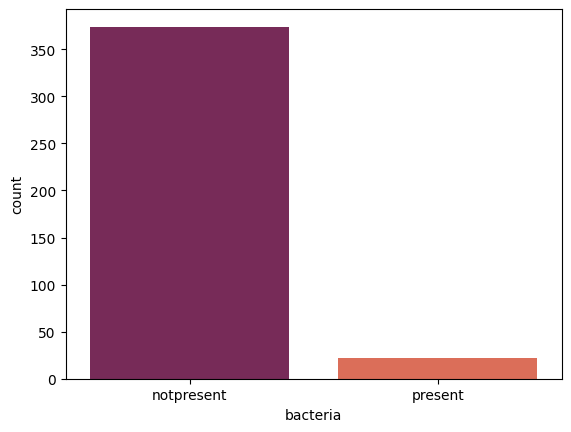

In [113]:
sns.countplot(df, x='bacteria',palette='rocket')

<Axes: xlabel='hypertension', ylabel='count'>

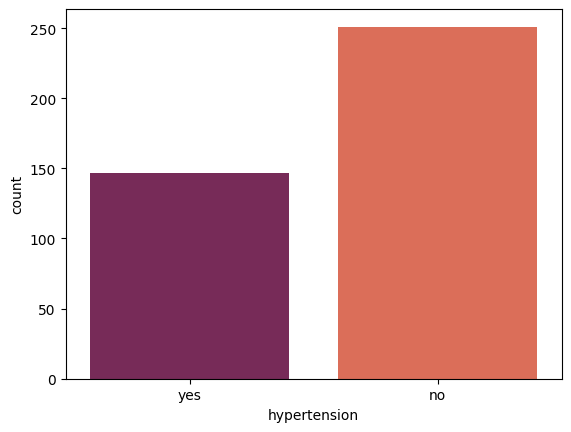

In [114]:
sns.countplot(df, x='hypertension',palette='rocket')

<Axes: xlabel='diabetes_mellitus', ylabel='count'>

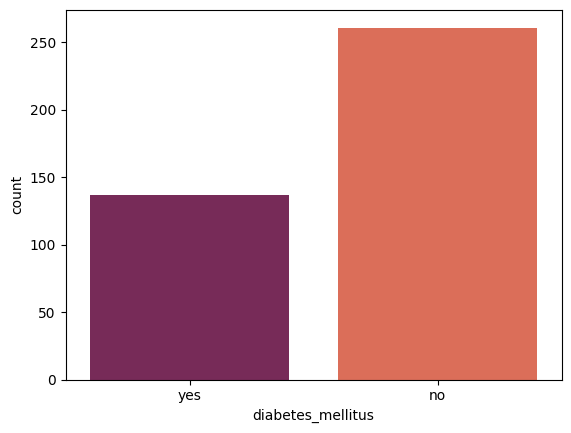

In [115]:
sns.countplot(df, x='diabetes_mellitus',palette='rocket')

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

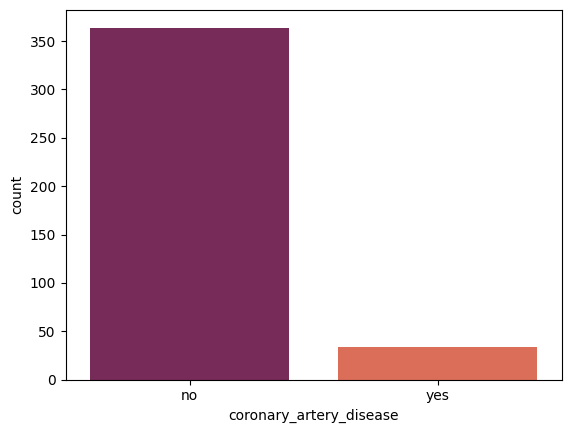

In [116]:
sns.countplot(df, x='coronary_artery_disease',palette='rocket')

<Axes: xlabel='appetite', ylabel='count'>

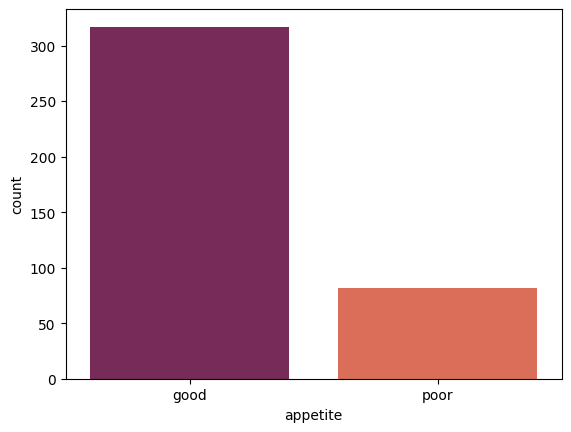

In [117]:
sns.countplot(df, x='appetite',palette='rocket')

<Axes: xlabel='peda_edema', ylabel='count'>

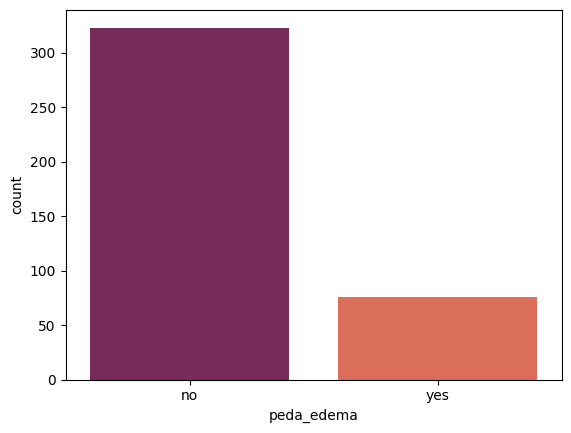

In [118]:
sns.countplot(df, x='peda_edema',palette='rocket')

<Axes: xlabel='anemia', ylabel='count'>

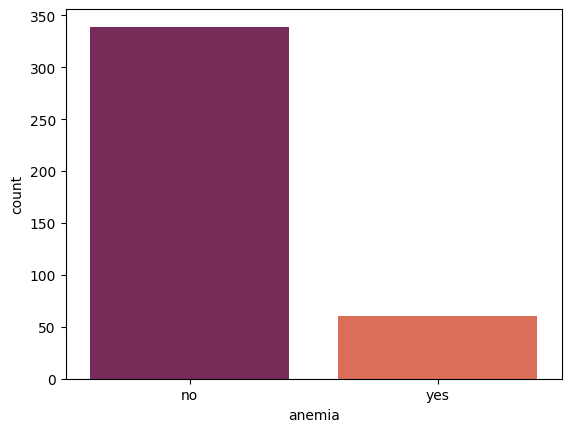

In [119]:
sns.countplot(df, x='anemia',palette='rocket')

In [120]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

In [121]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [122]:
violin('red_blood_cell_count')

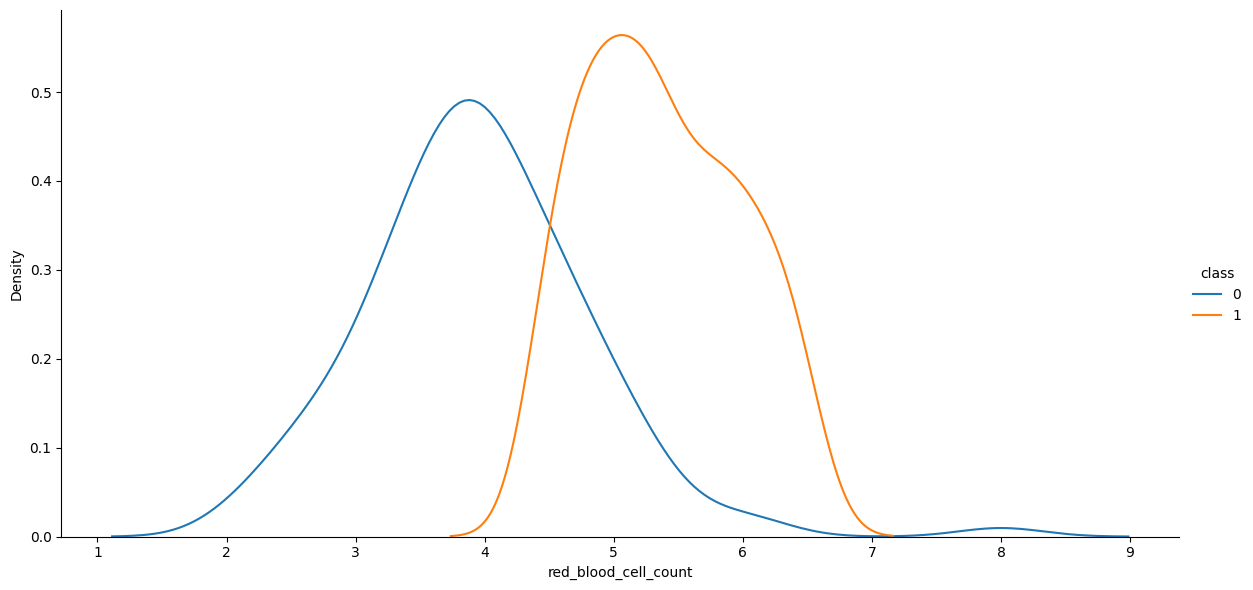

In [123]:
kde('red_blood_cell_count')

In [124]:
violin('white_blood_cell_count')

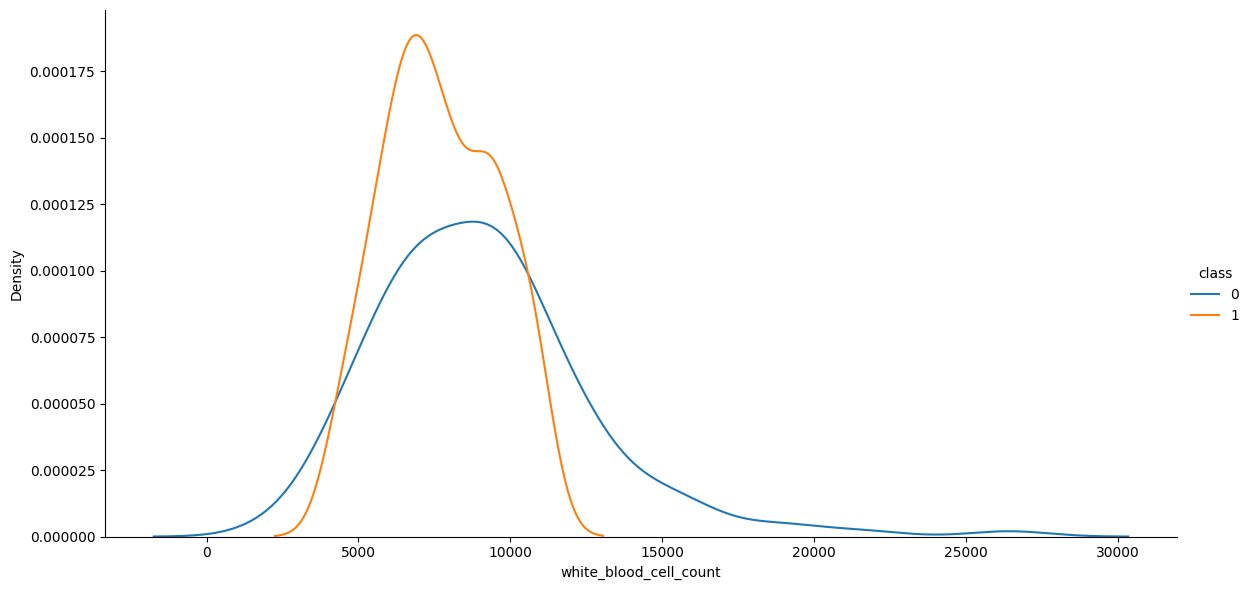

In [125]:
kde('white_blood_cell_count')

In [126]:
violin('packed_cell_volume')

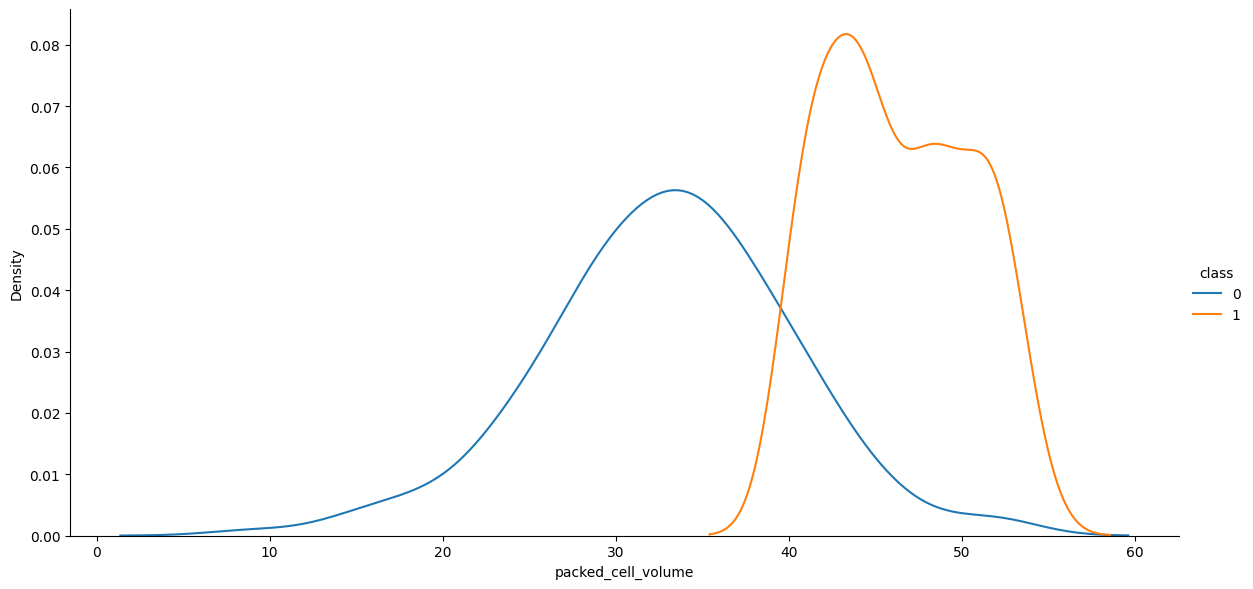

In [127]:
kde('packed_cell_volume')

In [128]:
violin('haemoglobin')

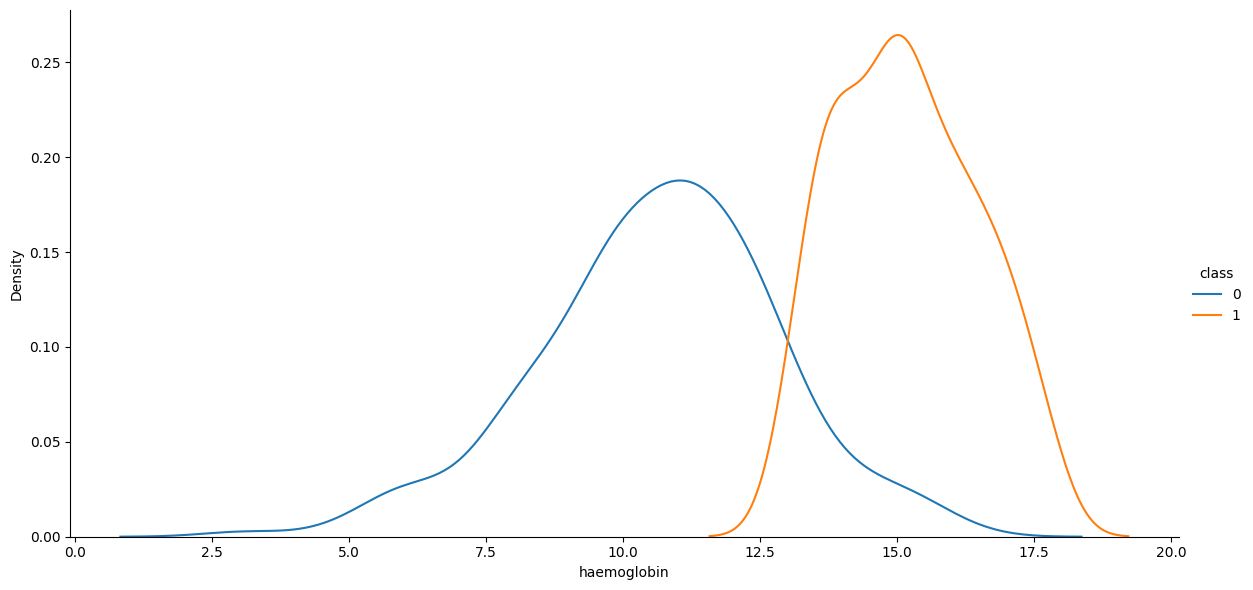

In [129]:
kde('haemoglobin')

In [130]:
violin('albumin')

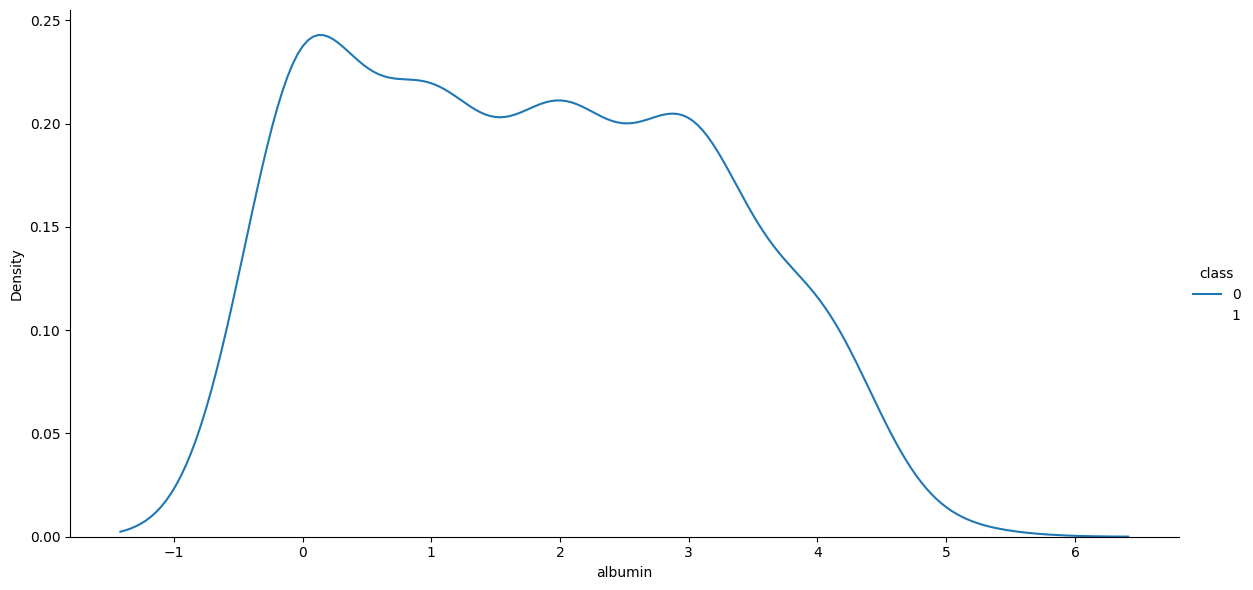

In [131]:
kde('albumin')

In [132]:
violin('blood_glucose_random')

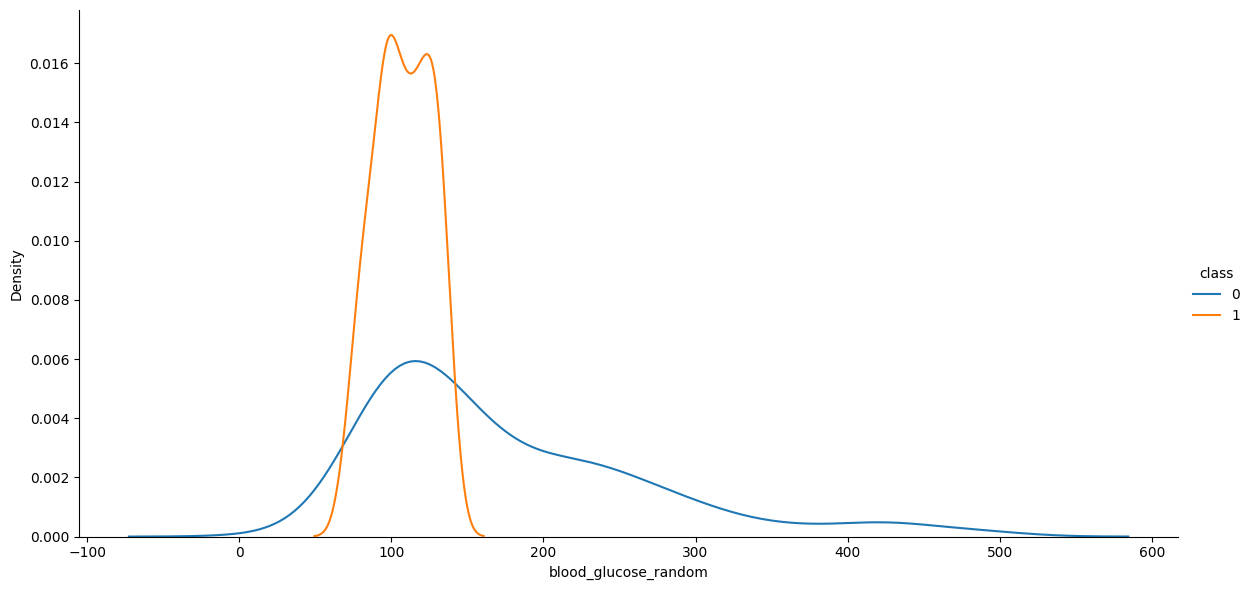

In [133]:
kde('blood_glucose_random')

In [134]:
violin('sodium')

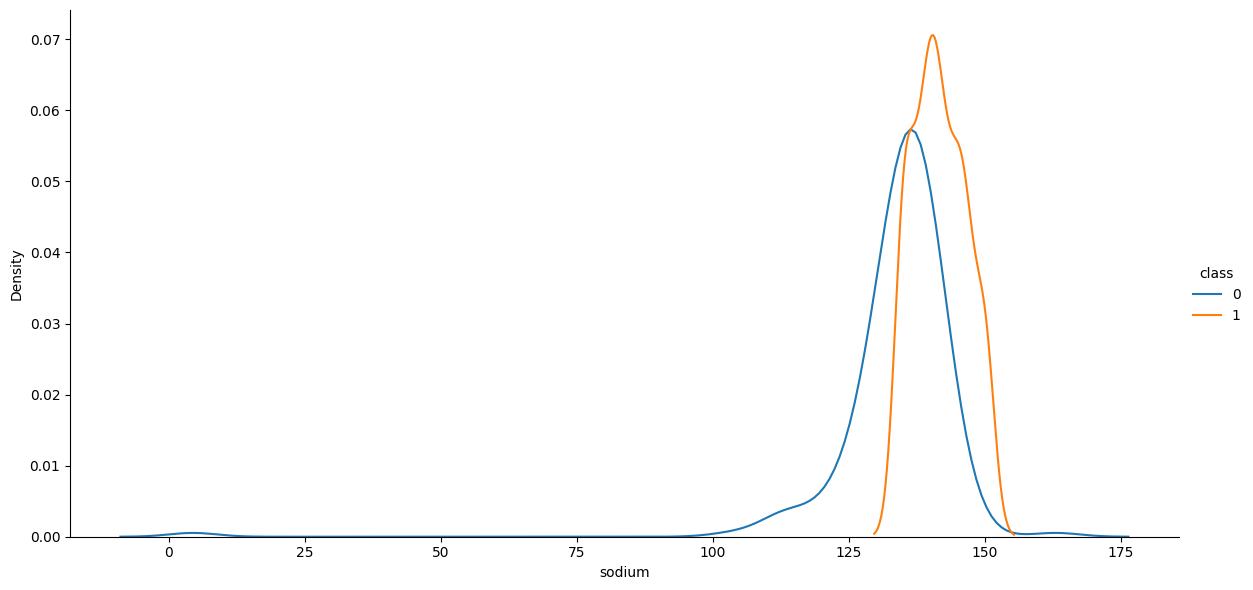

In [135]:
kde('sodium')

In [136]:
violin('blood_urea')

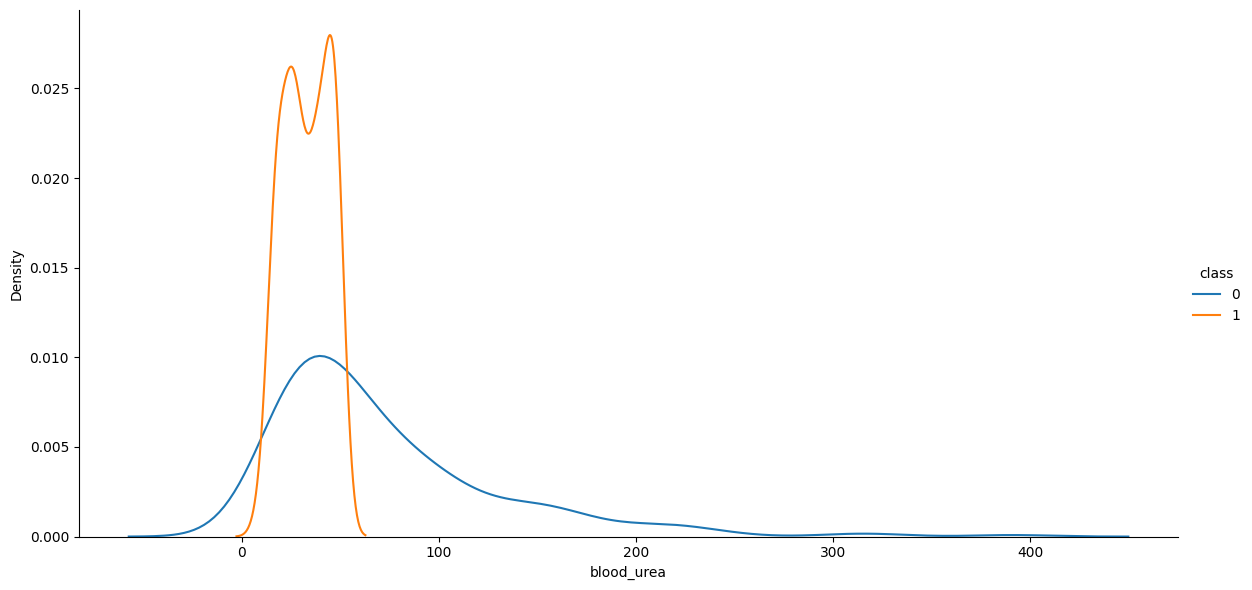

In [137]:
kde('blood_urea')

In [138]:
violin('specific_gravity')

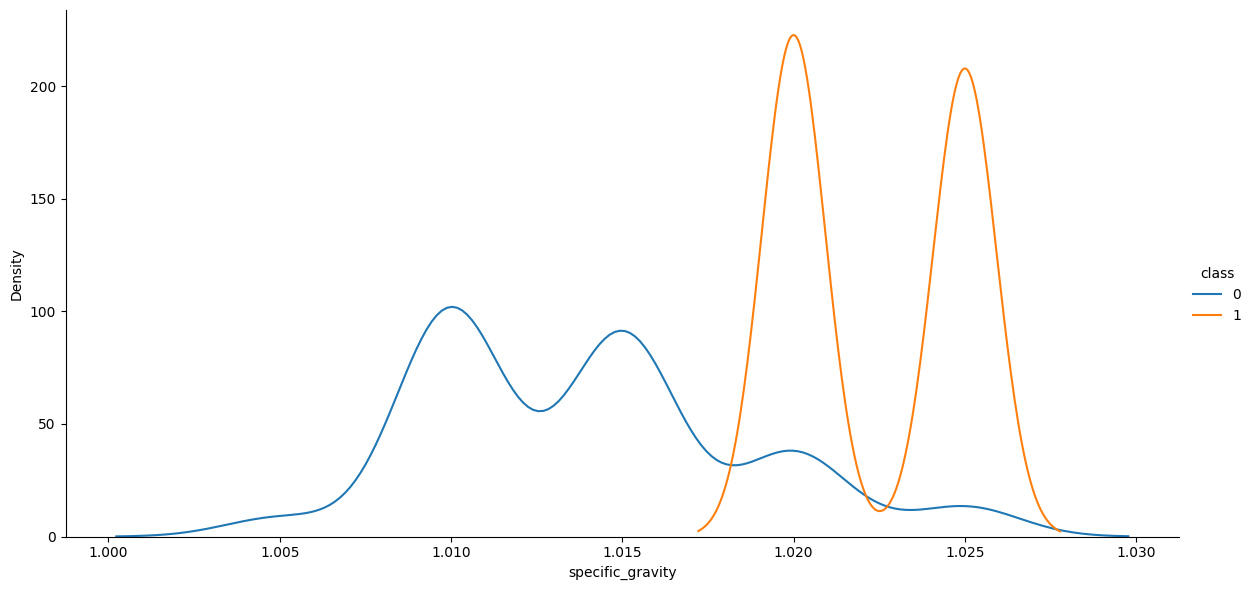

In [139]:
kde('specific_gravity')

The KDE Plot of age:



The KDE Plot of blood_pressure:



The KDE Plot of specific_gravity:



The KDE Plot of albumin:



The KDE Plot of sugar:



The KDE Plot of blood_glucose_random:



The KDE Plot of blood_urea:



The KDE Plot of serum_creatinine:



The KDE Plot of sodium:



The KDE Plot of potassium:



The KDE Plot of haemoglobin:



The KDE Plot of packed_cell_volume:



The KDE Plot of white_blood_cell_count:



The KDE Plot of red_blood_cell_count:





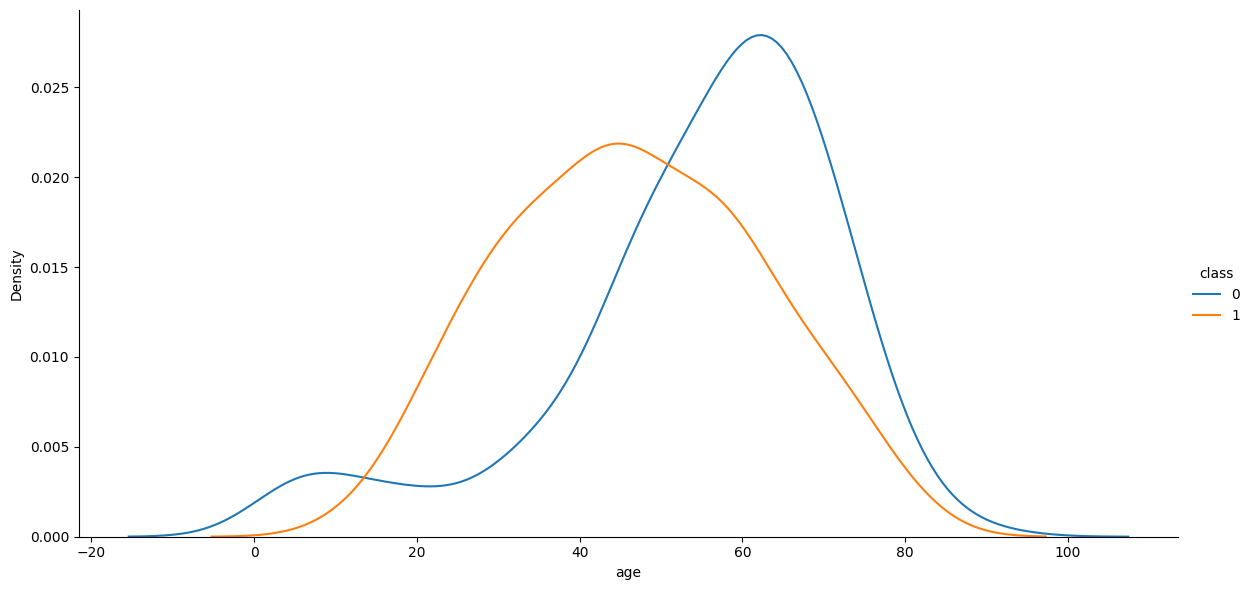

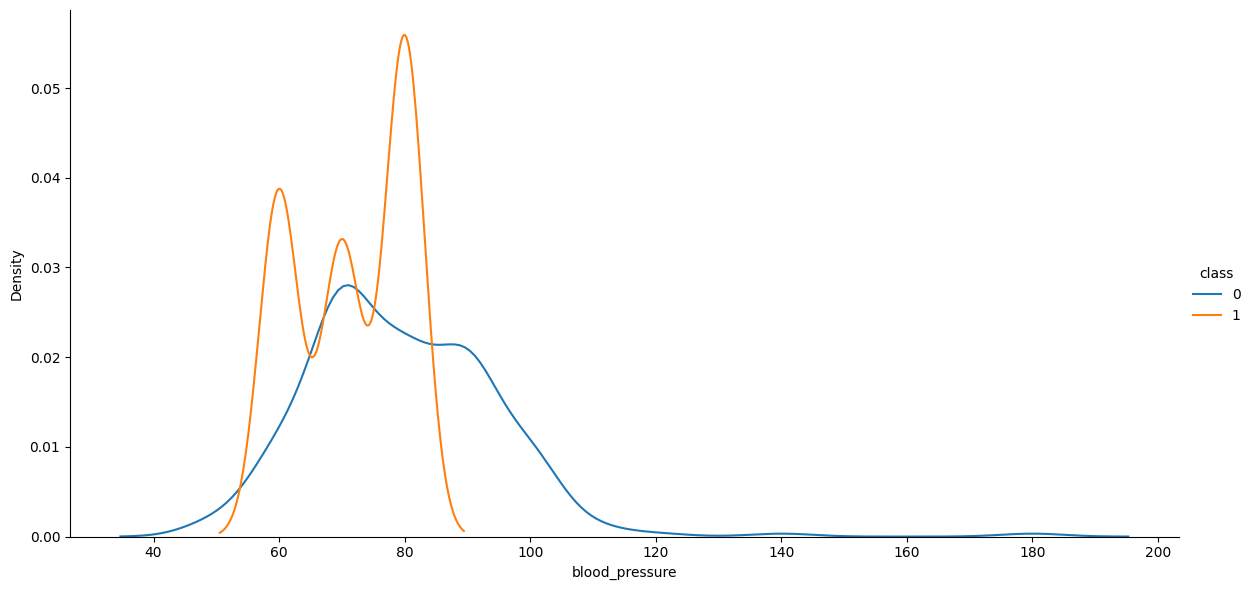

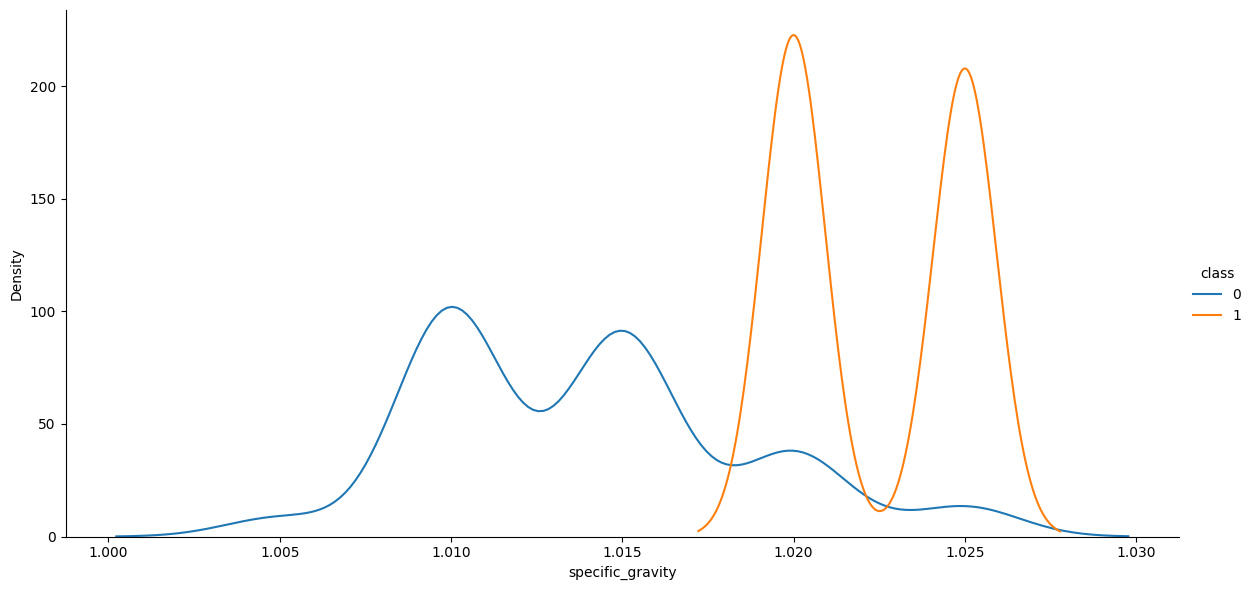

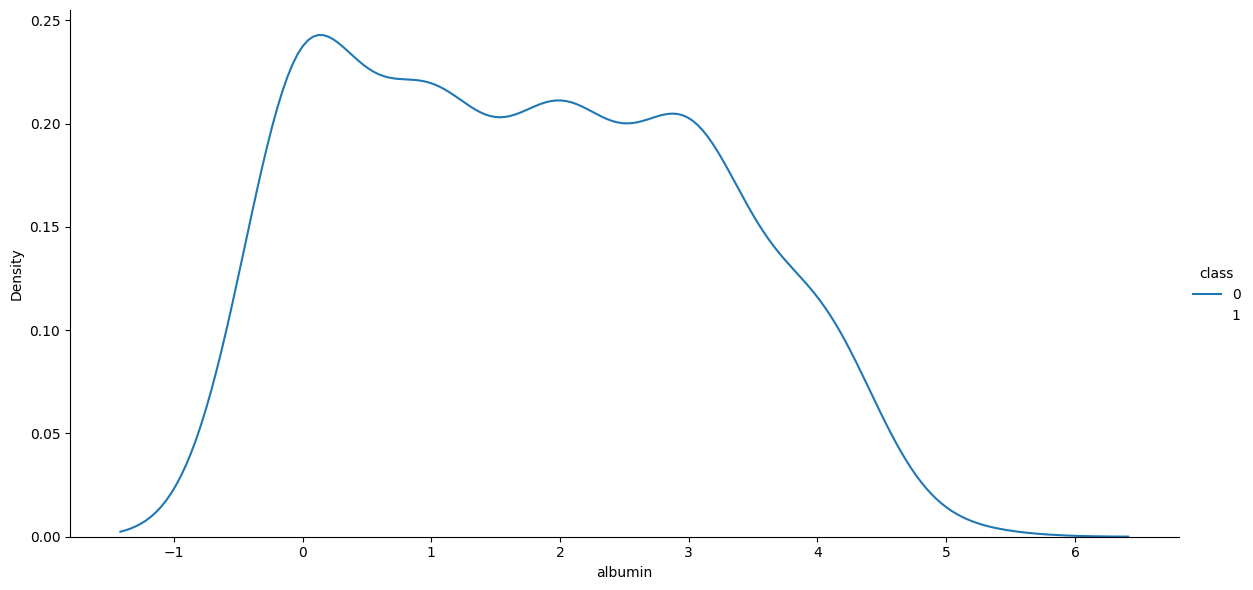

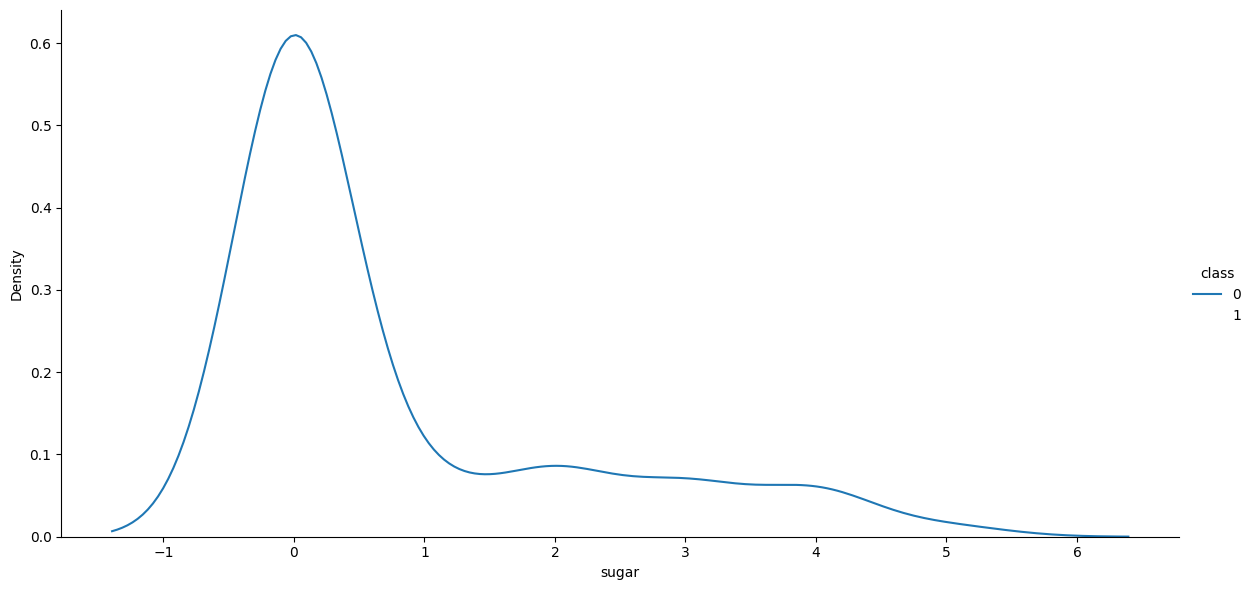

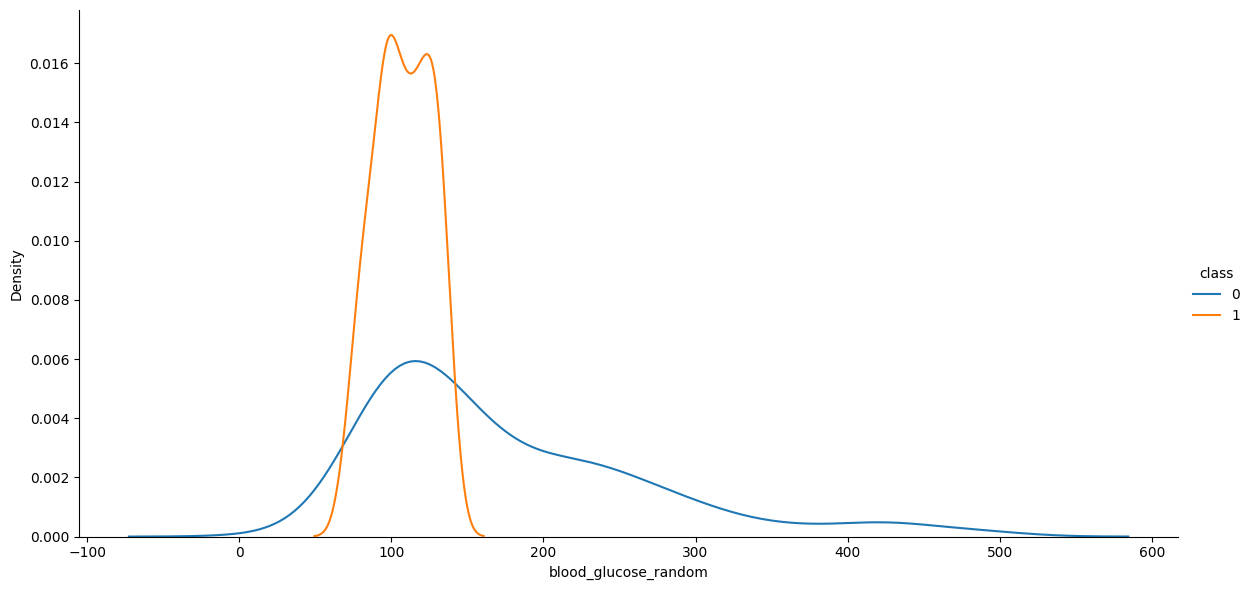

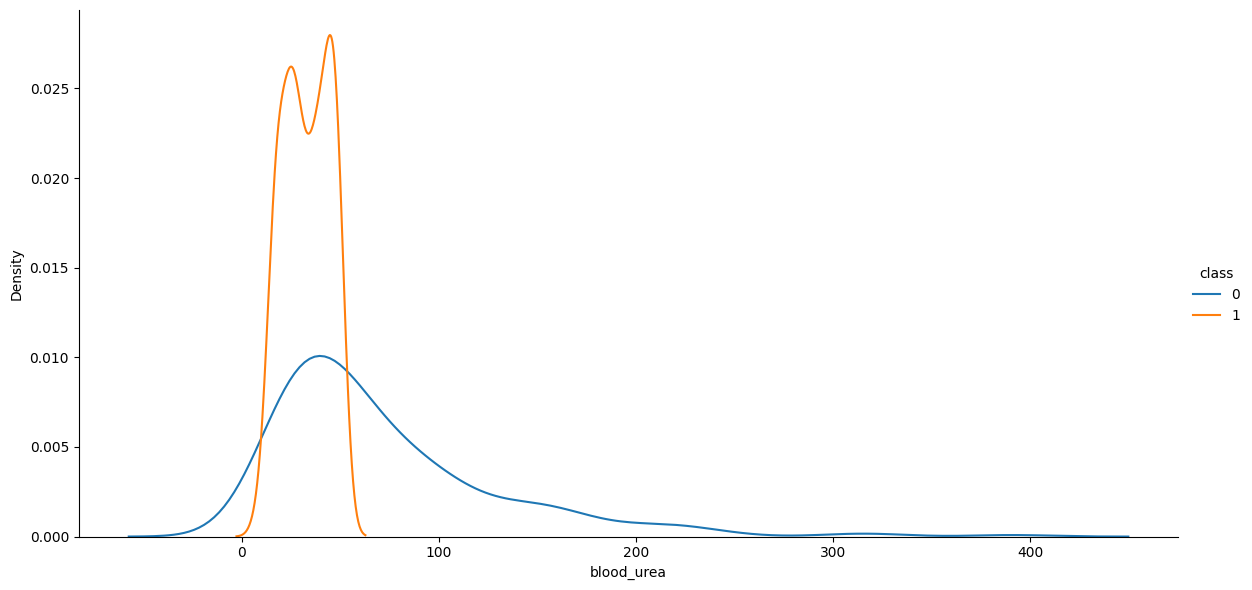

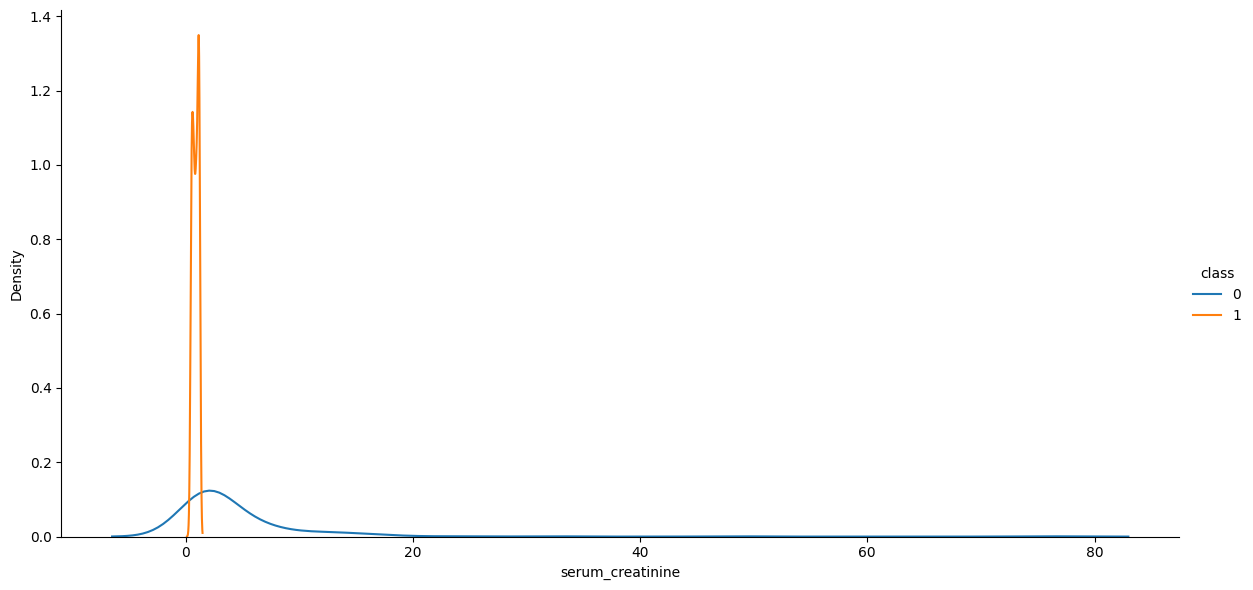

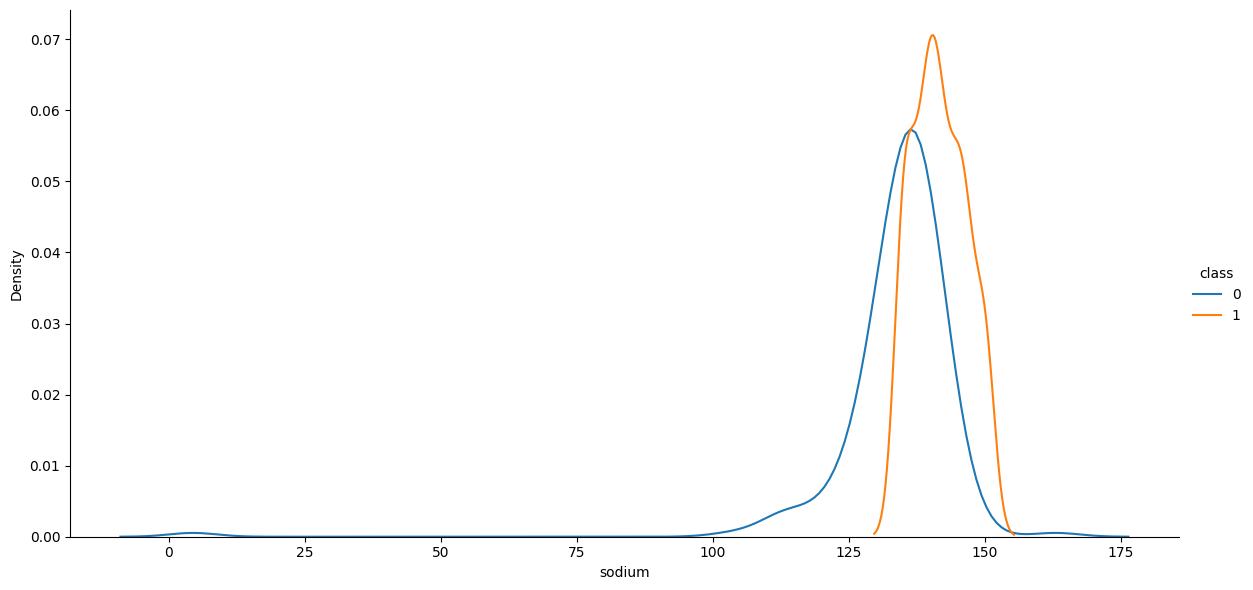

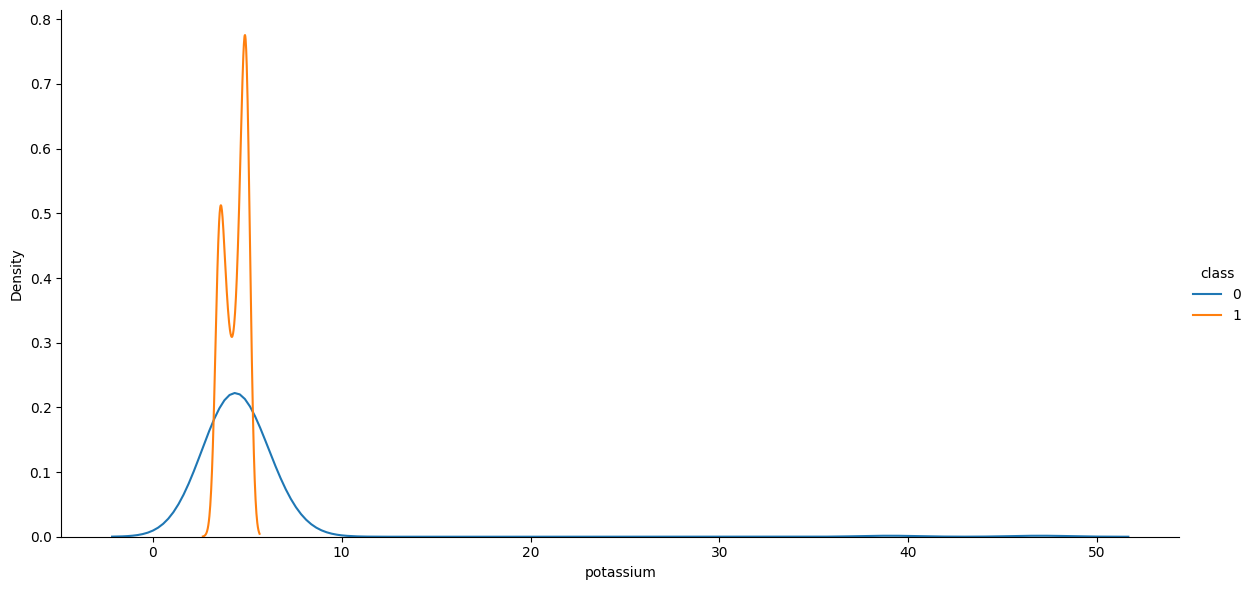

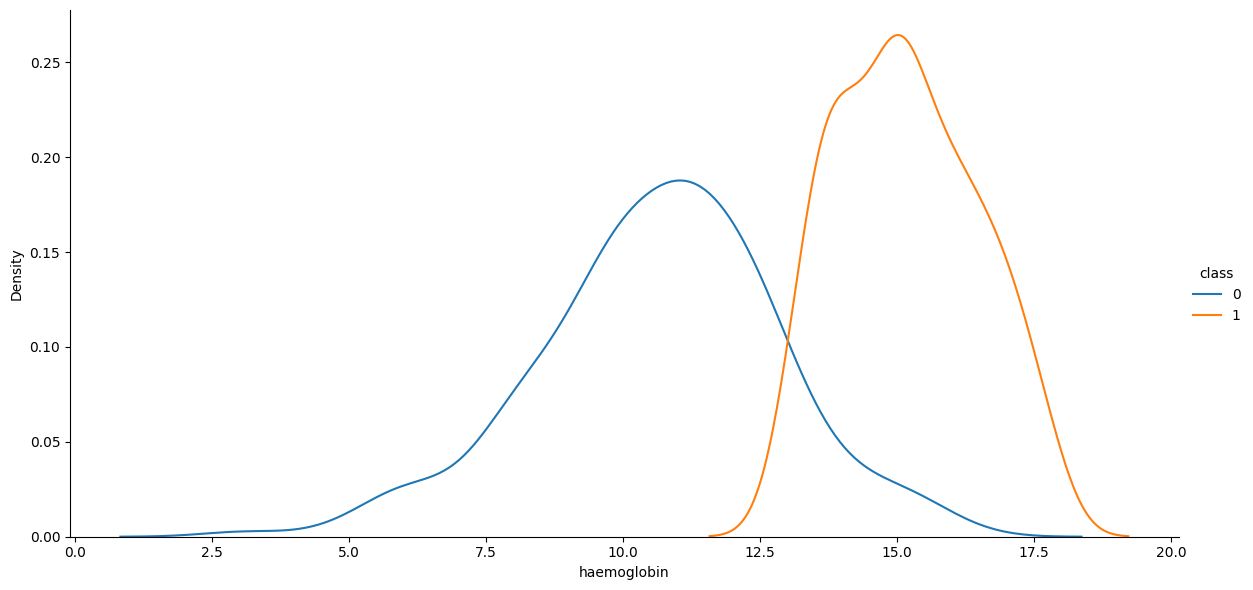

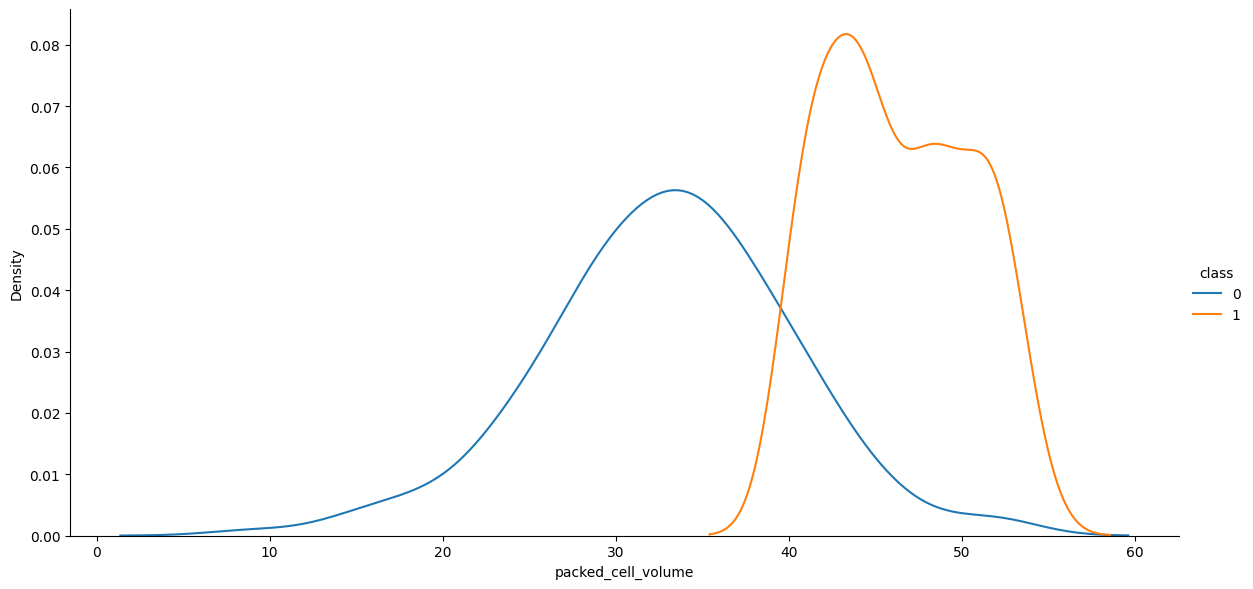

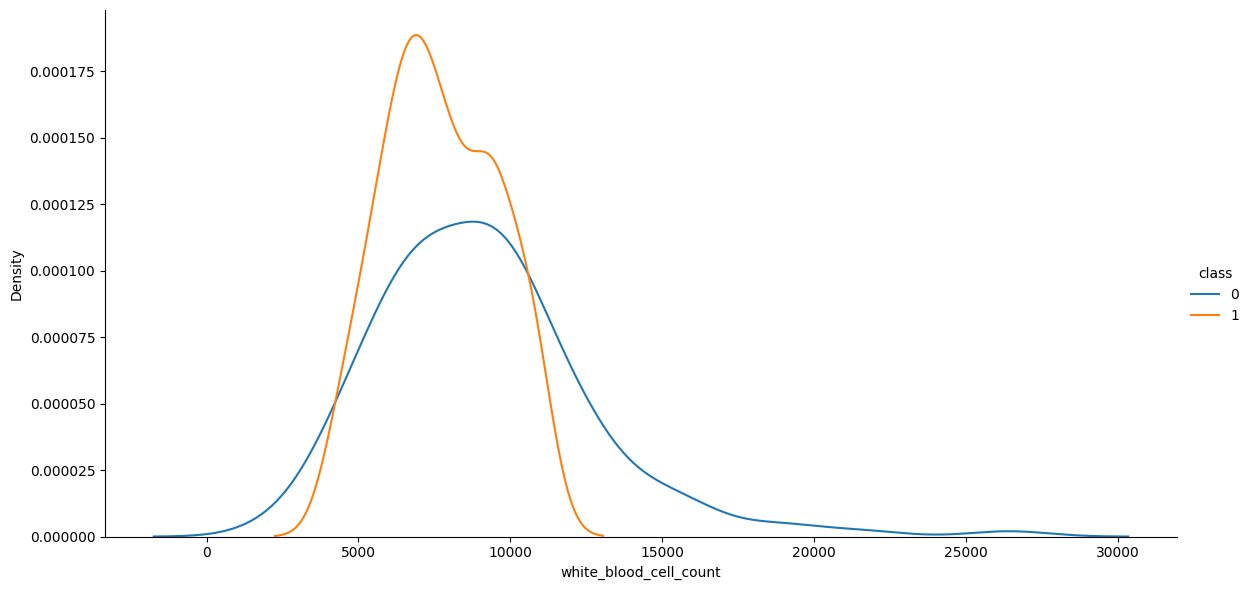

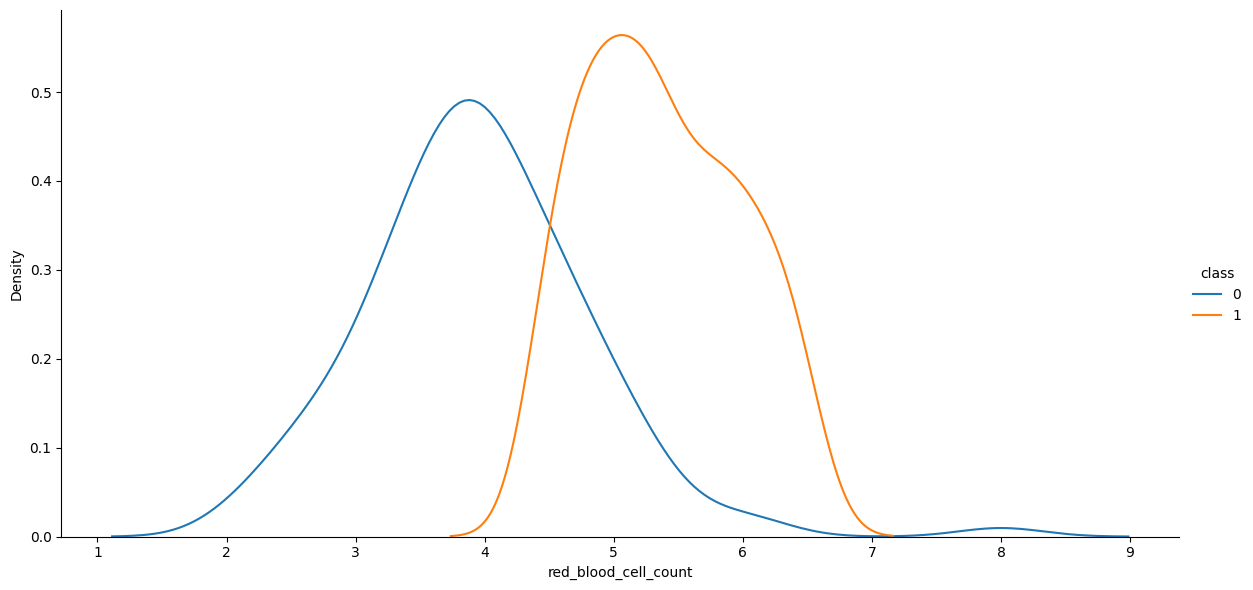

In [140]:
for i in num_cols:
  print(f"The KDE Plot of {i}:\n"); kde(i);print("\n");

In [141]:
scatter('red_blood_cell_count', 'albumin')

In [142]:
scatter('sugar', 'blood_glucose_random')

In [143]:
scatter('packed_cell_volume','blood_urea')

In [144]:
#sns.pairplot(data=df)

In [145]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [146]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [147]:
px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [148]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [149]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


<a id = '3.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Data Pre Processing</strong></p>

In [150]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [151]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [152]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [153]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample


print(df['age'].mode())
print(df['age'].mode()[0])

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

0    60.0
Name: age, dtype: float64
60.0


In [154]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [155]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [156]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [157]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

In [158]:
df

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,133.0,...,38.0,6000.0,4.1,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,3.2,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>All the missing values are handeled now, lets do ctaegorical features encding now</strong></p>

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p>

In [159]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

anemia has 2 categories

class has 2 categories



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As all of the categorical columns have 2 categories we can use label encoder</strong></p>

In [160]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [161]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
X = df.drop(columns=['class'])
y = df['class']

# Feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=15)  # Selecting best features
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Get selected feature values
selected_feature_values = X.iloc[:, selected_feature_indices]

# Print selected feature names and values
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'anemia'],
      dtype='object')


In [162]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
X = df.drop(columns=['class'])
y = df['class']

# Feature selection
selector1 = SelectKBest(score_func=chi2, k=15)  # Selecting best features
X_selected1 = selector1.fit_transform(X, y)

# Get selected feature indices
selected_feature_indices1 = selector1.get_support(indices=True)

# Get selected feature names
selected_feature_names1 = X.columns[selected_feature_indices1]

# Get selected feature values
selected_feature_values1 = X.iloc[:, selected_feature_indices1]

# Print selected feature names and values
print("Selected Feature Names:", selected_feature_names1)

Selected Feature Names: Index(['age', 'blood_pressure', 'albumin', 'sugar', 'blood_glucose_random',
       'blood_urea', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'appetite', 'peda_edema', 'anemia'],
      dtype='object')


Using Information Gain we are selected features half features

In [163]:
k=set(df.columns)^set(selected_feature_names)
k.remove("class")
print(list(k))

['peda_edema', 'age', 'white_blood_cell_count', 'appetite', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells', 'coronary_artery_disease', 'bacteria']


In [164]:
df=df.drop(list(k),axis=1)
df

,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,anemia,class
0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,139.0,3.4,15.4,44.0,5.2,1,1,0,0
1,50.0,1.020,4.0,0.0,133.0,18.0,0.8,141.0,4.1,11.3,38.0,4.1,0,0,0,0
2,80.0,1.010,2.0,3.0,423.0,53.0,1.8,140.0,3.5,9.6,31.0,3.2,0,1,1,0
3,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,3.9,1,0,1,0
4,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,3.0,11.6,35.0,4.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,4.9,0,0,0,1
396,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,6.2,0,0,0,1
397,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,5.4,0,0,0,1
398,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,5.9,0,0,0,1


In [165]:
df.to_csv('dataframe.csv', index=False)

In [166]:
df.isnull().sum()

blood_pressure          0
specific_gravity        0
albumin                 0
sugar                   0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
haemoglobin             0
packed_cell_volume      0
red_blood_cell_count    0
hypertension            0
diabetes_mellitus       0
anemia                  0
class                   0
dtype: int64

In [167]:
df.head()

,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,red_blood_cell_count,hypertension,diabetes_mellitus,anemia,class
0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,139.0,3.4,15.4,44.0,5.2,1,1,0,0
1,50.0,1.020,4.0,0.0,133.0,18.0,0.8,141.0,4.1,11.3,38.0,4.1,0,0,0,0
2,80.0,1.010,2.0,3.0,423.0,53.0,1.8,140.0,3.5,9.6,31.0,3.2,0,1,1,0
3,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,3.9,1,0,1,0
4,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,3.0,11.6,35.0,4.6,0,0,0,0


<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p>

In [168]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [169]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p>

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[77  0]
 [ 1 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        77
           1       1.00      0.98      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



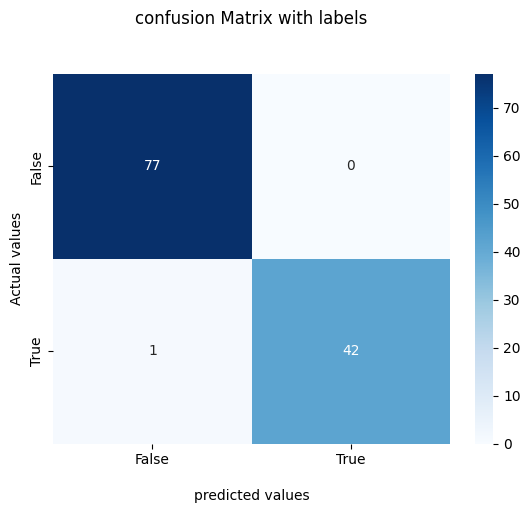

In [171]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, dtc.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [172]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[76  1]
 [ 2 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       0.98      0.95      0.96        43

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



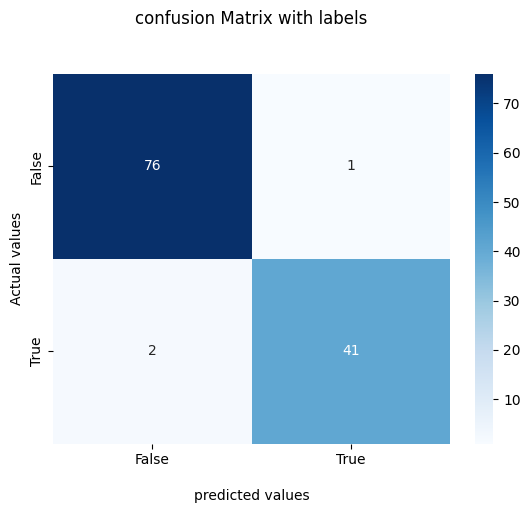

In [173]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, rd_clf.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

<a id = '5.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p>

In [174]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[76  1]
 [ 1 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.98      0.98      0.98        43

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



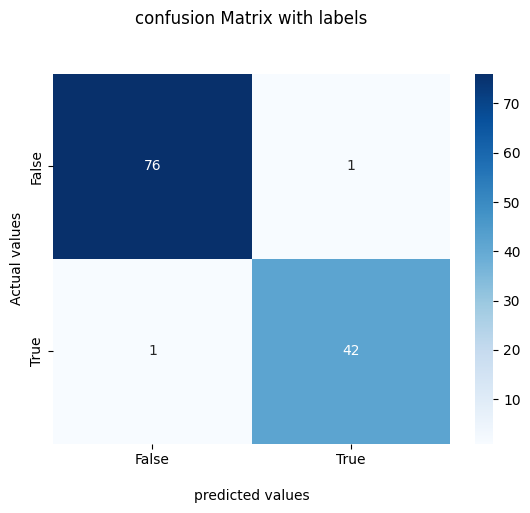

In [175]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, ada.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

<a id = '5.5'></a>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier (GBC)</strong></p>

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[76  1]
 [ 1 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        77
           1       0.98      0.98      0.98        43

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



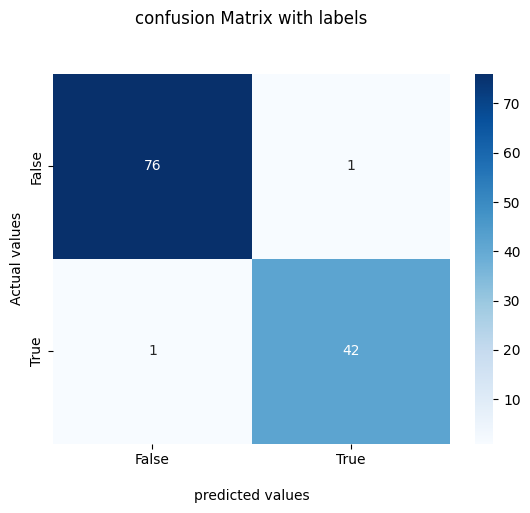

In [177]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, gb.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

<a id = '5.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>XgBoost</strong></p>

In [178]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9666666666666667 

Confusion Matrix :- 
[[75  2]
 [ 2 41]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        77
           1       0.95      0.95      0.95        43

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



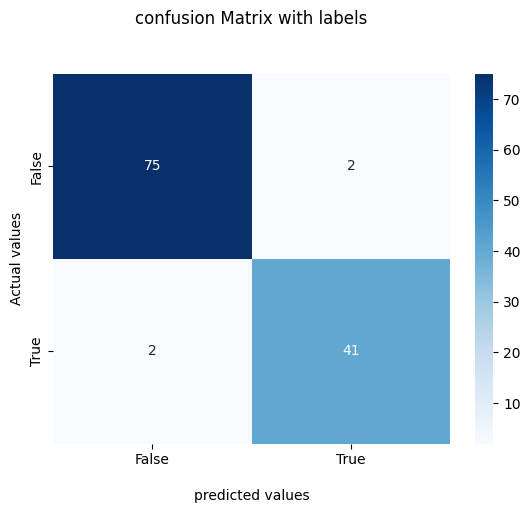

In [179]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

<a id = '5.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

In [180]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[76  1]
 [ 0 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.98      1.00      0.99        43

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



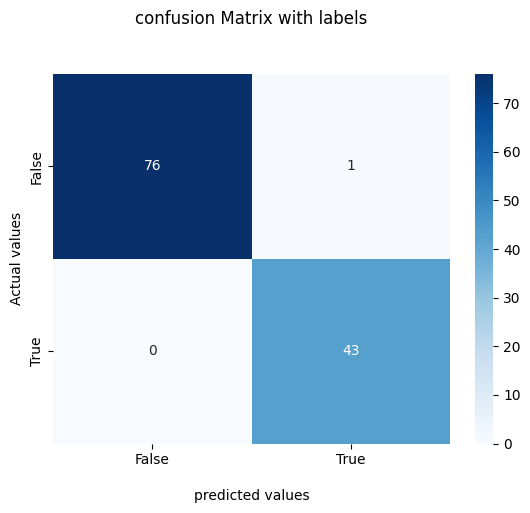

In [181]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, etc.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

###**SVM Classifier**

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create SVM Classifier
svm_classifier = SVC(kernel='linear')

# Train SVM Classifier
svm_classifier.fit(X_train, y_train)

# Predict the response for training dataset
y_train_pred = svm_classifier.predict(X_train)

# Predict the response for test dataset
y_test_pred = svm_classifier.predict(X_test)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
svm_acc = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", svm_acc)

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, svm_classifier.predict(X_test))}\n")

Training Accuracy: 0.9892857142857143
Testing Accuracy: 0.95
Confusion Matrix :- 
[[72  5]
 [ 1 42]]



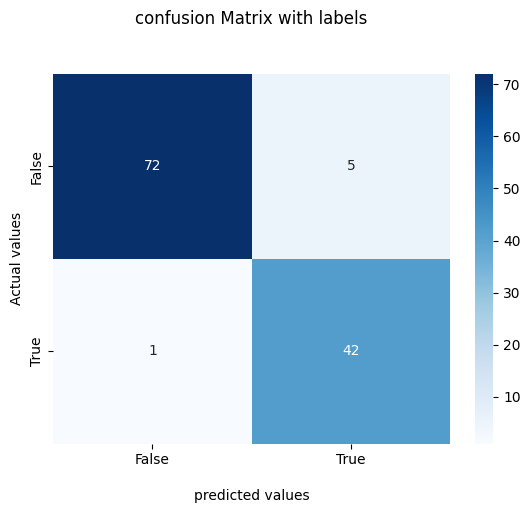

In [183]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, svm_classifier.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Light Gradient Boost

In [192]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 107, number of negative: 173
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382143 -> initscore=-0.480463
[LightGBM] [Info] Start training from score -0.480463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

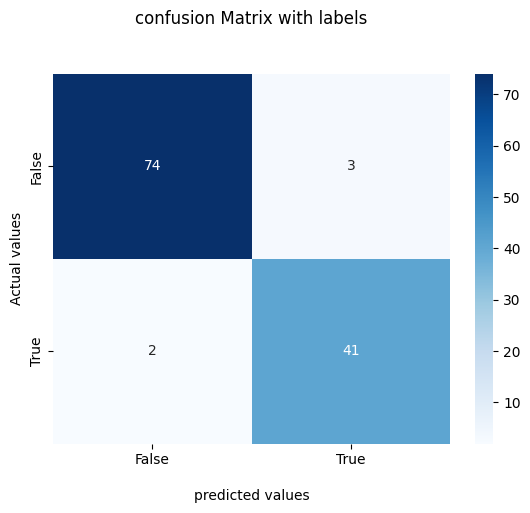

In [185]:
import seaborn as sns
ax=sns.heatmap(confusion_matrix(y_test, lgbm.predict(X_test)),annot=True,cmap='Blues')
ax.set_title('confusion Matrix with labels\n\n');
ax.set_xlabel('\npredicted values')
ax.set_ylabel('Actual values');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p>

In [188]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier','Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier','SVM Classifier','Light GBM'],
    'Score' : [ dtc_acc, rd_clf_acc, ada_acc, gb_acc, xgb_acc, etc_acc, svm_acc, lgbm_acc]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Decision Tree Classifier,0.991667
5,Extra Trees Classifier,0.991667
2,Ada Boost Classifier,0.983333
3,Gradient Boosting Classifier,0.983333
1,Random Forest Classifier,0.975000
4,XgBoost,0.966667
7,Light GBM,0.958333
6,SVM Classifier,0.950000


In [189]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Final Output</strong></p>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>0:ckd &nbsp; 1:not ckd</strong></p>

In [194]:
import numpy as np
index_val=np.random.randint(399, size=1)
print(index_val)

[393]


In [195]:
class_droped_df = df.drop('class', axis=1)
features= class_droped_df.loc[index_val].to_numpy()
print(features)

[[ 60.      1.025   0.      0.    117.     45.      0.7   141.      4.4
   13.     54.      5.4     0.      0.      0.   ]]


In [196]:
features_original_val= df.loc[index_val].to_numpy()
print(features_original_val)

[[ 60.      1.025   0.      0.    117.     45.      0.7   141.      4.4
   13.     54.      5.4     0.      0.      0.      1.   ]]


In [197]:
#features = np.array([[80, 1.02, 1.00,0.00,1.00,121.00,36.00,1.20,145.00,15.40,44.00,5.20,1.00,1.00,0.00]])
# using inputs to predict the output
prediction = rd_clf.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [1]


In [198]:
if prediction==[0]:
  print("They are Suffering from Chronic Kidney Disease")
else:
  print("They are not Suffering from Chronic Kidney Disease")

They are not Suffering from Chronic Kidney Disease
